# CH03 신경망

## 3.1 퍼셉트론에서 신경망으로

* 신경망은 입력층, 은닉층, 출력층으로 구성
* 퍼셉트론에 편향을 명시토록하면
  * a = h(b + w1*x1+w2*x2)
  * y = h(a)
* 이때 h(x)가 활성화 함수 (입력 신호의 총합을 출력 신호로 변환) 

## 3.2 활성화 함수

* 계단함수
    * 계단함수는 임곗값을 경계로 출력이 바뀜
    * 앞서 본 퍼셉트론의 함수또한 계단 함수

In [1]:
# 계단함수 구현 (실수 입력 ver)
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [2]:
# 계단함수 구현 (넘파이 배열 입력ver)
def step_function(x):
    y = x > 0 # Bool 배열로 변환
    return y.astype(int) # astype로 true 는 1 flase 는 0 으로 바꿈

In [3]:
# 살사용
import numpy as np
x_temp = np.array([-1.0, 1.0, 2.0])
step_function(x_temp)

array([0, 1, 1])

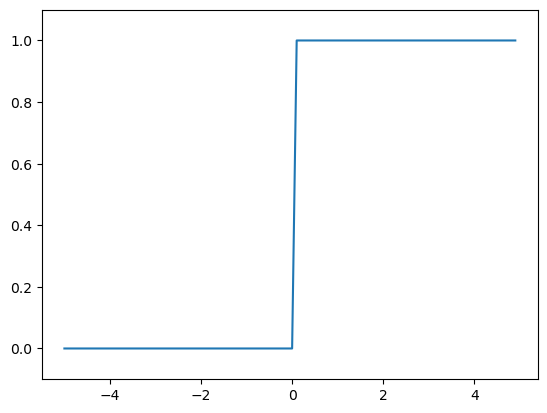

In [4]:
# 계단함수의 그래프
import matplotlib.pyplot as plt
x_step = np.arange(-5.0,5.0,0.1)
y_step = step_function(x_step)
plt.plot(x_step,y_step)
plt.ylim(-0.1,1.1)
plt.show()

* 시그모이드 함수
    * h(x) = 1 / 1 + exp(-x)
    * 시그모이드 함수는 신경망에서 자주 사용 됨

In [5]:
# 시그모이드 함수 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
# 실사용
x_temp = np.array([-1.,1.,2.])
sigmoid(x_temp)

array([0.26894142, 0.73105858, 0.88079708])

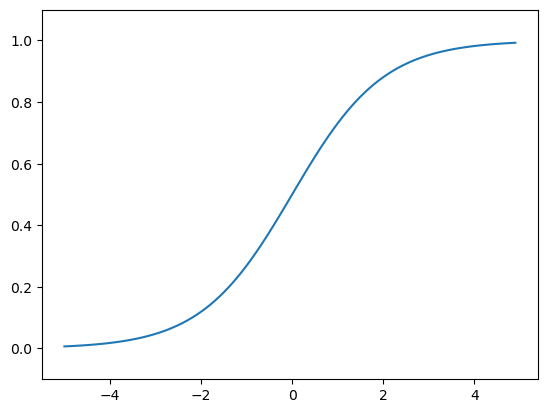

In [7]:
x_sig = np.arange(-5.,5.,0.1)
y_sig = sigmoid(x_sig)
plt.plot(x_sig,y_sig)
plt.ylim(-0.1,1.1)
plt.show()

두 활성 함수 비교
* 공통점
    * 입력이 작으면 0에 가까움(혹은 0)
    * 입력이 크면 1에 가까움 (혹은 1)
    * 둘다 비선형 함수 (선형 함수는 층이 아무리 깊어도 "층이 없는 네트워크"와 동일하기에 활성화 함수로서 이점이 없음. )
* 차이점 (시그모이드 || 계단함수)
    * 입력따라 매끄럽게 변함 || 경계를 기준으로 급격하게 변함
    * 연속적인 값 반환 || 0또는 1만 반환

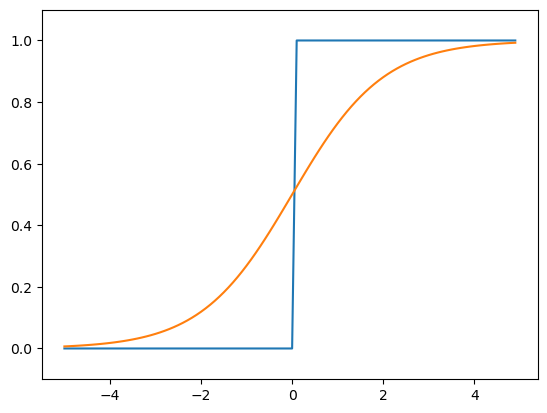

In [8]:
plt.plot(x_step,y_step)
plt.plot(x_sig,y_sig)
plt.ylim(-0.1,1.1)
plt.show()

* Relu 함수
    * 최근에는 활성화 함수로 ReLU를 많이 사용 

In [9]:
#ReLU 구현
def ReLU(x):
    np.maximum(0,x)

## 3.3 다차원 배열의 계산

A가 array일때
* np.ndim(A)함수 : A의 차원 정수로 반환
* A.shape 인스턴스 변수 : A의 형상 튜플로 반환 (m,n) 반환 시 m x n 배열이라는 뜻

In [10]:
A = np.array([[1.,2.,3.],[2.,4.,5.]])
print(np.ndim(A))
print(A.shape)

2
(2, 3)


**행렬의 도트 곱**
np.dot(A,B) 함수 사용
행렬의 곱을 구현한 것이라 규칙 같음
* (a)ik * (b)lj = (c)ij
* m x r * r x n = m * n 꼴이어야 연산 가능

In [11]:
A = np.array([[1.,2.,3.],[2.,4.,5.]])
B = np.array([[1,3],[2,3],[4,5]])
np.dot(A,B)

array([[17., 24.],
       [30., 43.]])

**신경망에서의 행렬곱**
* X x(입력값)의 행렬
* W w(가중치)의 행렬
* Y y(결괏값)의 행렬

X W = Y 로 생각

In [12]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현

1층(A)의 신호를 구현 시  
A = XW + B  
A = (a1 a2 a3)  
W = (  
  w11 w12 w13  
  w21 w22 w33  
)

In [13]:
X = np.array([1.,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

(2, 3)
(2,)
(3,)


In [14]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [15]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [16]:
def identity_function(x):
    return(x) # 출력층의 활성화 함수는 은닉층의 함수와는 다름을 표기

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

## 3.5 출력층 설계

In [17]:
def softmax_(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

이때 e^x가 지수 함수이기에 값이 조금만 커져도 ex) x = 1000  
Overflow가 발생함  

이를 해결하기 위해 분자 분모에 각각 임의의 실수를 곱하고  
이를 log의 성질을 활용하여 exp 안에 넣으면  
다음과 같이 정리가 가능하다  
**보통 임의의 실수는 값 중에서 최댓값으로 설정**

In [18]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [19]:
a = np.array([1010,1000,990])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

**softmax()함수의 특징**
* 0에서 1.0 사이의 실수값을 출력
* **출력의 총합이 0** (확률로 해석이 가능해짐)

## 3.6 손글씨 숫자 인식

### Predict (추론) 처리과정

In [ ]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)
img = x_train[0]
label = t_train[0]
print("img shape :",img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
img shape : (784,)
(28, 28)


이미 적절하게 설정 된 가중치 w 와 편향 b 가 들어있는 pikle 파일을  
그대로 불러와 사용 함 (추론 과정만 구현 중)

In [23]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False, one_hot_label = False)
    
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [24]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt+=1
print("Accuracy:"+str(float(accuracy_cnt) / len(x)))

C:\Users\skack\AppData\Local\Temp\ipykernel_25312\2037644832.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Accuracy:0.9207


### 배치처리 과정

In [29]:
x,_ = get_data()
network = init_network()
W1,W2,W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784, 50)
(50, 100)
(100, 10)


In [31]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p =np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

C:\Users\skack\AppData\Local\Temp\ipykernel_25312\2037644832.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [32]:
print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9207
